In [4]:
#Imporing liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [6]:
wine=pd.read_csv('winequality.csv')
wine

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.70,0.037,20.0,84.0,0.99046,3.09,0.53,11.40,6,981
1,6.7,0.44,0.31,1.90,0.030,41.0,104.0,0.99000,3.29,0.62,12.60,7,982
2,6.1,0.17,0.21,1.90,0.090,44.0,130.0,0.99255,3.07,0.41,9.70,5,983
3,6.6,0.39,0.22,4.00,0.038,17.0,98.0,0.99018,3.25,0.53,13.00,7,984
4,6.8,0.32,0.34,6.00,0.050,5.0,129.0,0.99530,3.19,0.40,9.10,5,985
5,8.3,0.28,0.27,17.50,0.045,48.0,253.0,1.00014,3.02,0.56,9.10,6,986
6,6.8,0.14,0.35,1.50,0.047,40.0,117.0,0.99111,3.07,0.72,11.10,6,987
7,6.3,0.21,0.31,1.20,0.043,30.0,117.0,0.99158,3.49,0.68,11.00,6,988
8,6.7,0.31,0.08,1.30,0.038,58.0,147.0,0.99220,3.18,0.46,10.00,5,989
9,5.9,0.27,0.29,11.40,0.036,31.0,115.0,0.99490,3.35,0.48,10.50,8,990


In [7]:
wine.shape

(3918, 13)

In [8]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 13 columns):
fixed.acidity           3918 non-null float64
volatile.acidity        3918 non-null float64
citric.acid             3918 non-null float64
residual.sugar          3918 non-null float64
chlorides               3918 non-null float64
free.sulfur.dioxide     3918 non-null float64
total.sulfur.dioxide    3918 non-null float64
density                 3918 non-null float64
pH                      3918 non-null float64
sulphates               3918 non-null float64
alcohol                 3918 non-null float64
quality                 3918 non-null int64
id                      3918 non-null int64
dtypes: float64(11), int64(2)
memory usage: 398.0 KB


In [10]:
wine.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
fixed.acidity,1.000000,-0.018244,0.297831,0.093249,0.017633,-0.057874,0.079012,0.267259,-0.431066,-0.011915,-0.126329,-0.111060,-0.003867
volatile.acidity,-0.018244,1.000000,-0.140043,0.077979,0.069602,-0.096284,0.088366,0.033974,-0.045407,-0.032703,0.071912,-0.189113,0.002768
citric.acid,0.297831,-0.140043,1.000000,0.106384,0.109368,0.088143,0.114861,0.157975,-0.165478,0.059628,-0.077949,-0.008064,-0.012135
residual.sugar,0.093249,0.077979,0.106384,1.000000,0.096991,0.303088,0.411613,0.842294,-0.199808,-0.012444,-0.453181,-0.101570,-0.008736
chlorides,0.017633,0.069602,0.109368,0.096991,1.000000,0.101693,0.195431,0.260935,-0.086290,0.014115,-0.363394,-0.214543,-0.000853
free.sulfur.dioxide,-0.057874,-0.096284,0.088143,0.303088,0.101693,1.000000,0.623179,0.294149,0.004650,0.063534,-0.250605,0.002892,0.001765
total.sulfur.dioxide,0.079012,0.088366,0.114861,0.411613,0.195431,0.623179,1.000000,0.532155,0.002910,0.143494,-0.451141,-0.177076,-0.001720
density,0.267259,0.033974,0.157975,0.842294,0.260935,0.294149,0.532155,1.000000,-0.101704,0.080072,-0.778263,-0.313763,0.004997
pH,-0.431066,-0.045407,-0.165478,-0.199808,-0.086290,0.004650,0.002910,-0.101704,1.000000,0.151962,0.123085,0.097981,0.014263
sulphates,-0.011915,-0.032703,0.059628,-0.012444,0.014115,0.063534,0.143494,0.080072,0.151962,1.000000,-0.010429,0.053632,0.011202


In [11]:
wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'id'],
      dtype='object')

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 13 columns):
fixed.acidity           3918 non-null float64
volatile.acidity        3918 non-null float64
citric.acid             3918 non-null float64
residual.sugar          3918 non-null float64
chlorides               3918 non-null float64
free.sulfur.dioxide     3918 non-null float64
total.sulfur.dioxide    3918 non-null float64
density                 3918 non-null float64
pH                      3918 non-null float64
sulphates               3918 non-null float64
alcohol                 3918 non-null float64
quality                 3918 non-null int64
id                      3918 non-null int64
dtypes: float64(11), int64(2)
memory usage: 398.0 KB


In [13]:
wine['quality'].unique()

array([6, 7, 5, 8, 4, 3, 9], dtype=int64)

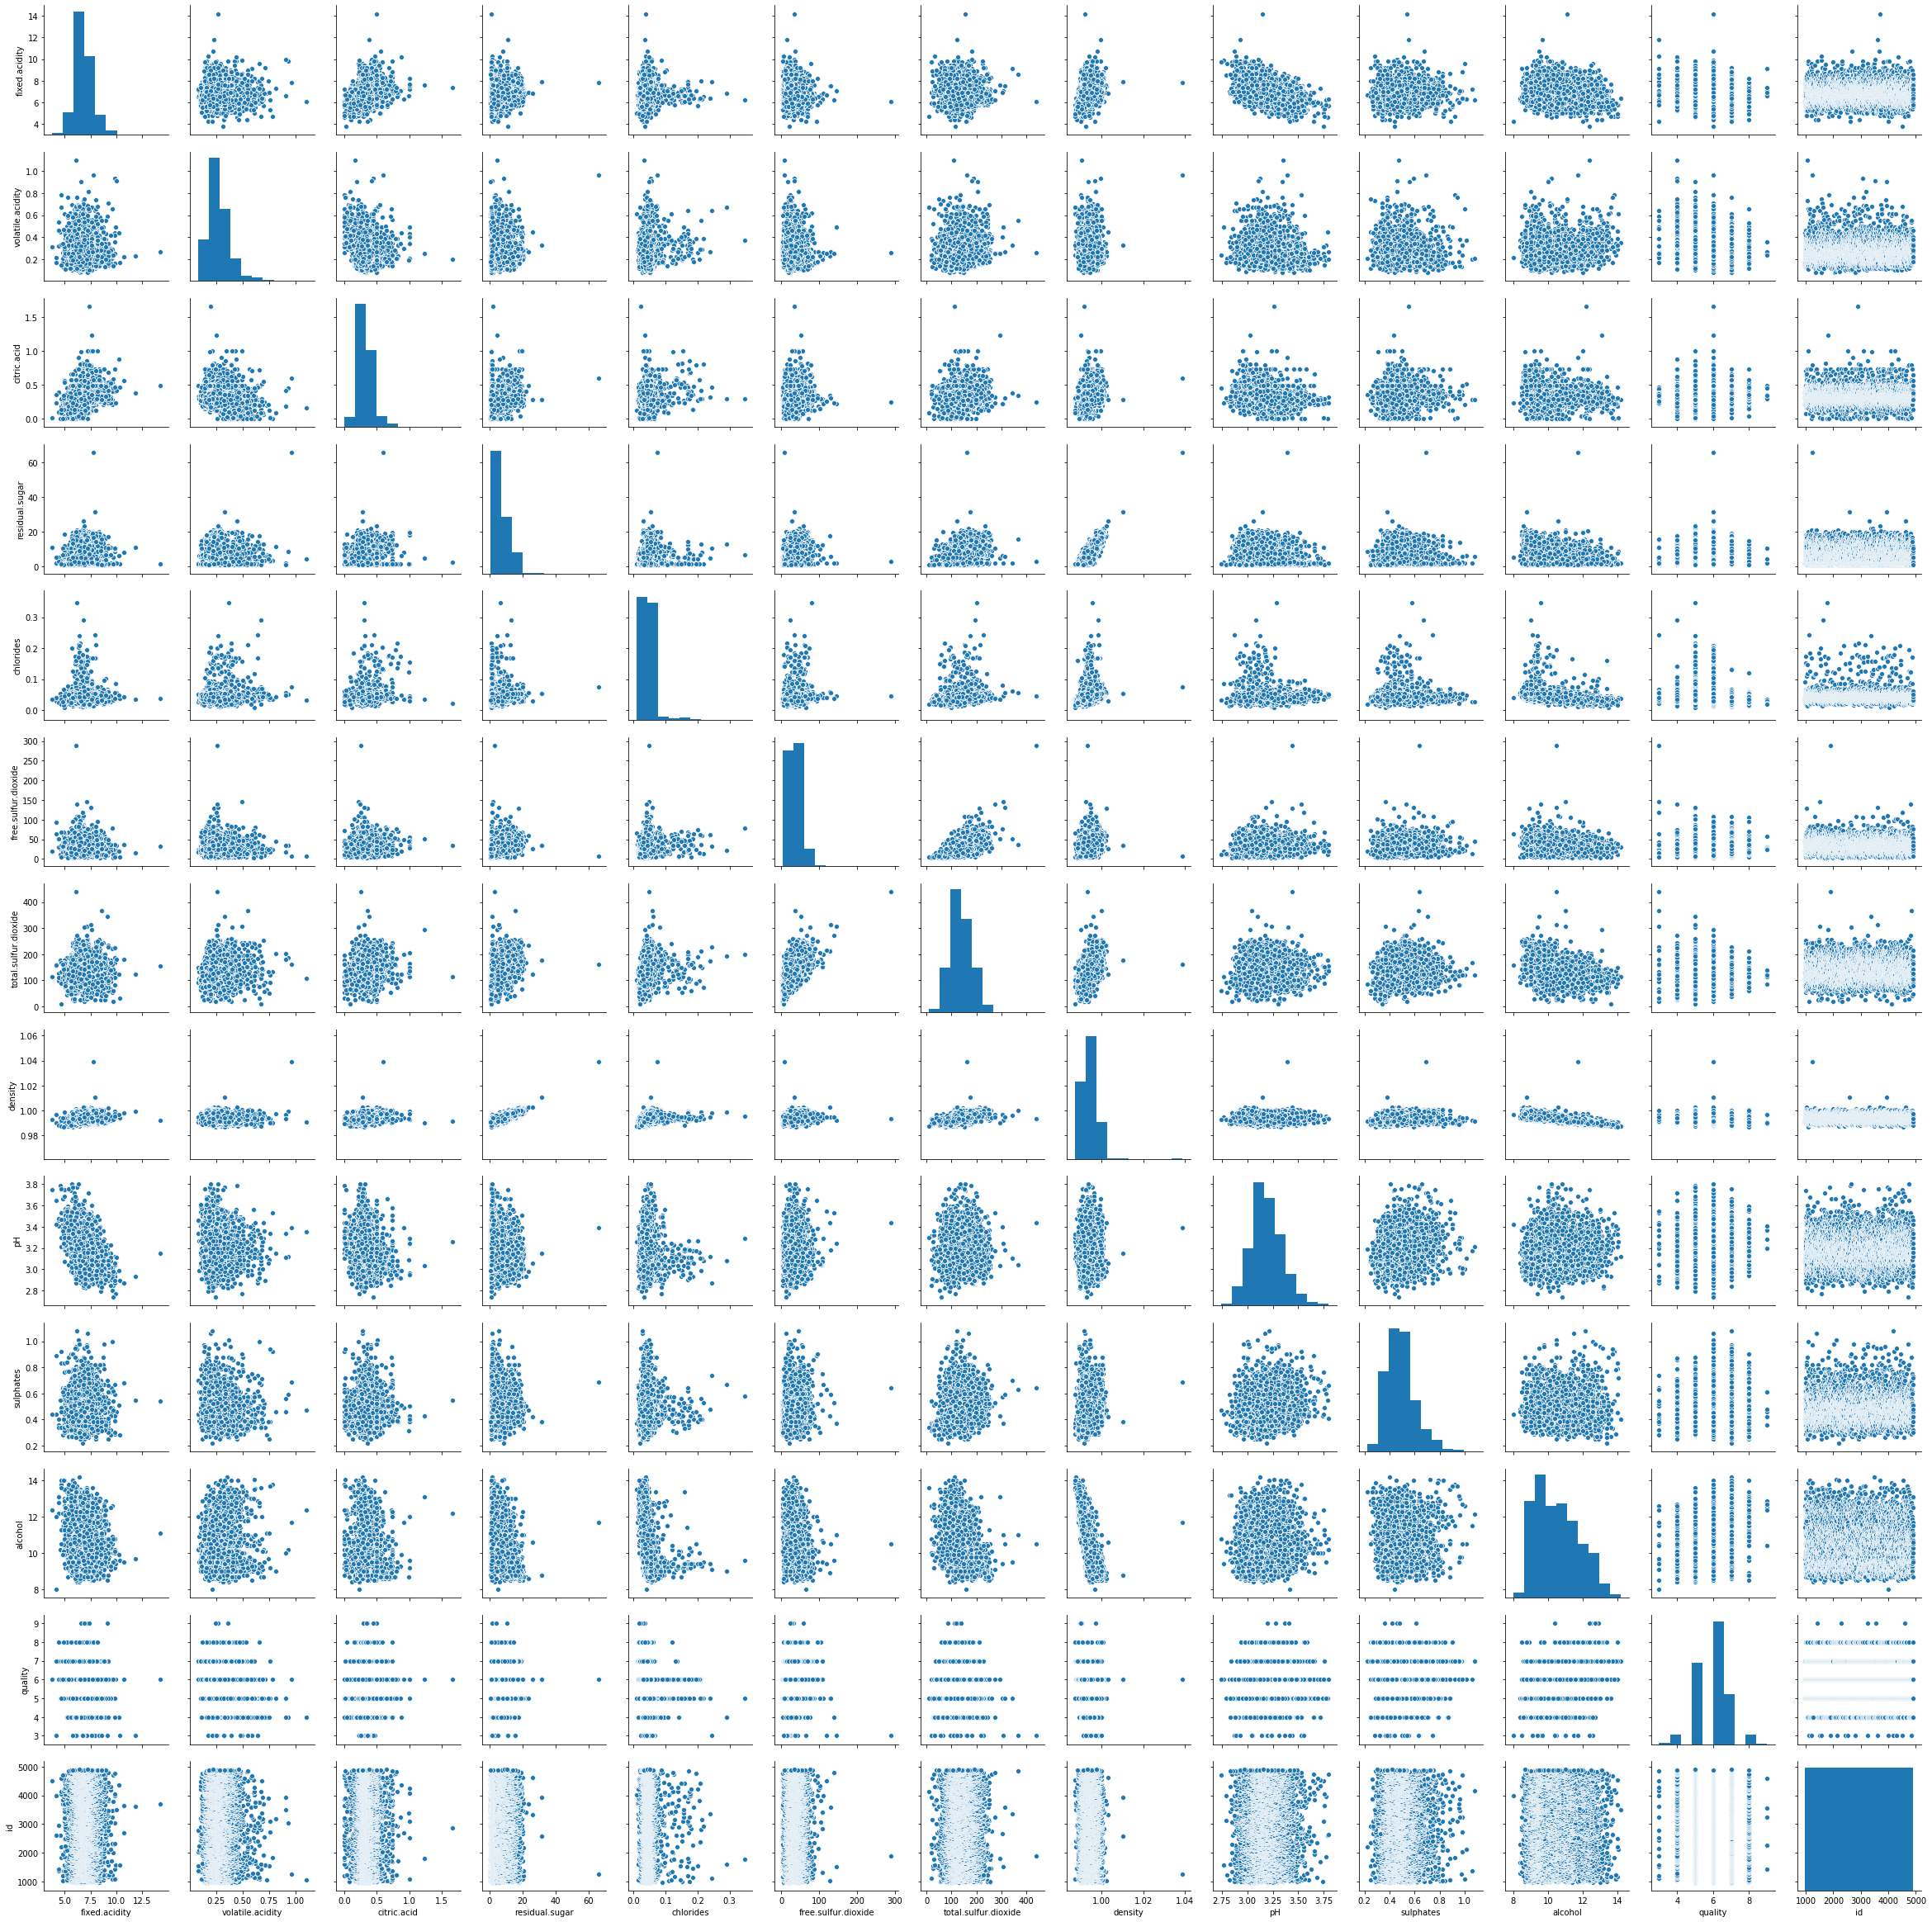

In [14]:
#bivariate analysis
sns.pairplot(wine)

In [15]:
#counting target variables
from collections import Counter
Counter(wine['quality'])

Counter({6: 1752, 7: 707, 5: 1163, 8: 140, 4: 134, 3: 17, 9: 5})

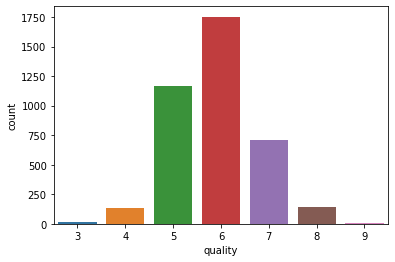

In [16]:
#plotting the count ofthe target data
sns.countplot(x='quality',data=wine)

In [17]:
wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'id'],
      dtype='object')

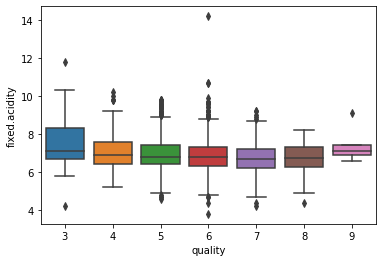

In [18]:
#checking outliers against target variable
sns.boxplot('quality', 'fixed.acidity', data = wine)


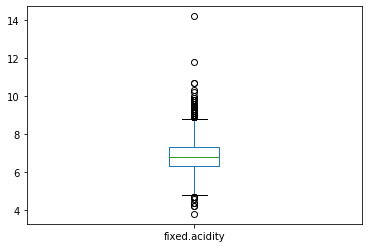

In [19]:
wine['fixed.acidity'].plot.box()

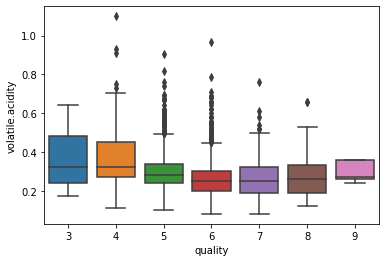

In [20]:
sns.boxplot('quality', 'volatile.acidity', data = wine)

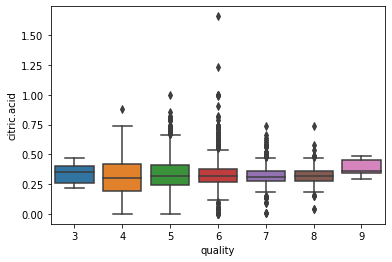

In [22]:
sns.boxplot('quality', 'citric.acid', data = wine)

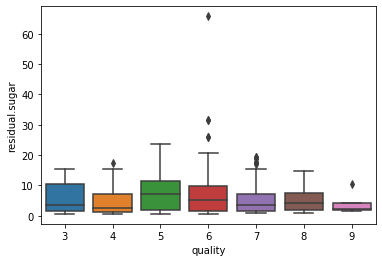

In [23]:
sns.boxplot('quality', 'residual.sugar', data = wine)

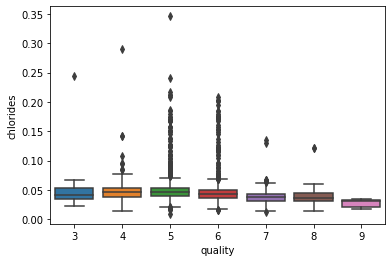

In [24]:
sns.boxplot('quality', 'chlorides', data = wine)

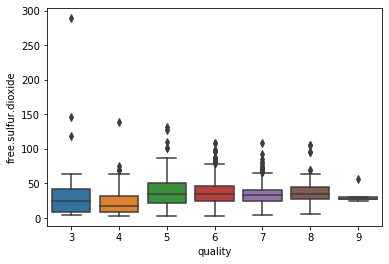

In [25]:
sns.boxplot('quality', 'free.sulfur.dioxide', data = wine)

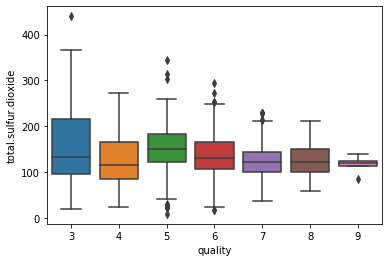

In [26]:
sns.boxplot('quality', 'total.sulfur.dioxide', data = wine)

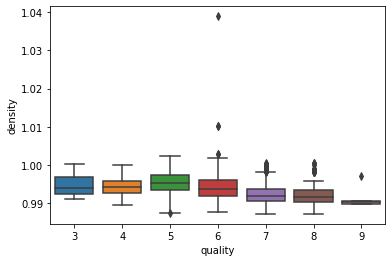

In [27]:
sns.boxplot('quality', 'density', data = wine)

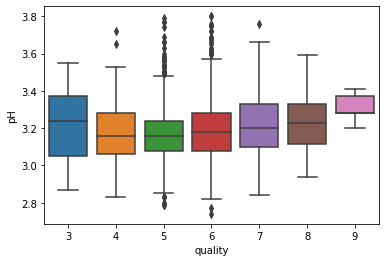

In [28]:
sns.boxplot('quality', 'pH', data =wine)

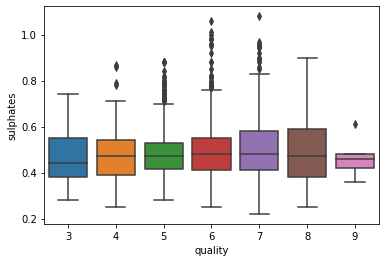

In [29]:
sns.boxplot('quality', 'sulphates', data = wine)

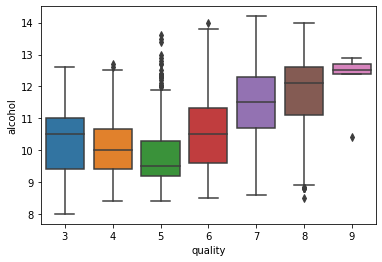

In [30]:
sns.boxplot('quality', 'alcohol', data = wine)

In [31]:
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854620,0.278027,0.333201,6.405819,0.045566,35.326187,138.395227,0.994026,3.187989,0.489704,10.518765,5.877489,2939.500000
std,0.841879,0.100459,0.121375,5.107972,0.021138,17.158043,42.996820,0.003025,0.150022,0.114186,1.237195,0.890364,1131.173506
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000,981.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,107.250000,0.991700,3.090000,0.410000,9.500000,5.000000,1960.250000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000,2939.500000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,168.000000,0.996160,3.280000,0.550000,11.400000,6.000000,3918.750000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.800000,1.080000,14.200000,9.000000,4898.000000


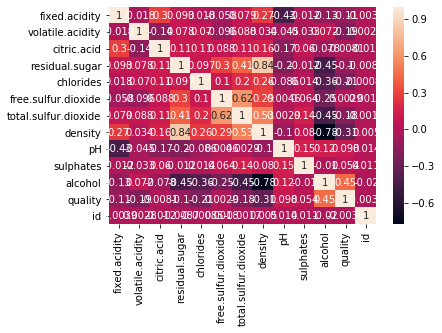

In [32]:
sns.heatmap(wine.corr(),annot=True)
plt.show()

In [33]:
#creating new column called 'review'
#it contain 1,2 and 3
#1-->Not well
#2-->Average
#3-->Good
#this will be splitting in this way
#1,2,3---Notwell
#4,5,6,7---Average
#8,9,10---Good
reviews=[]
for i in wine['quality']:
    if i >= 1 and i<=3:
        reviews.append('1')
    elif i>=4 and i<=7:
        reviews.append('2')
    elif i>=8 and i<=10:
        reviews.append('3')
        
wine['reviews']=reviews    

In [34]:
wine.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'id', 'reviews'],
      dtype='object')

In [35]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id,reviews
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981,2
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982,2
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983,2
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984,2
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985,2


In [36]:
wine['reviews'].unique()

array(['2', '3', '1'], dtype=object)

In [37]:
#
wine['reviews'].value_counts()

2    3756
3     145
1      17
Name: reviews, dtype: int64

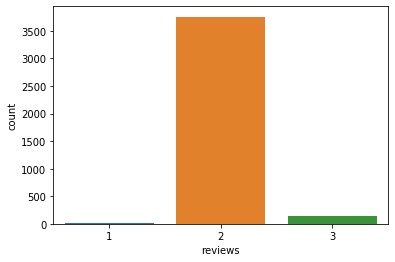

In [38]:
sns.countplot(wine['reviews'])

In [39]:
#splitting the data
x=wine.drop('reviews',axis=1)

In [40]:
x.shape

(3918, 13)

In [41]:
y=wine['reviews']

In [42]:
y.shape

(3918,)

In [43]:
#Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

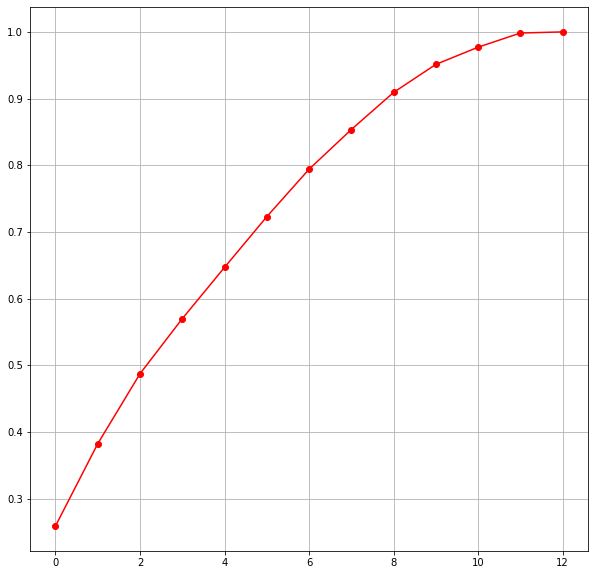

In [46]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [47]:
pca=PCA(n_components=8)
x=pca.fit_transform(x)

In [48]:
print(x)

[[-2.05448369 -0.98846795 -0.78767581 ... -0.5063024  -0.63958553
  -0.25684665]
 [-2.49917321  0.75297738 -0.39944635 ...  2.17081614  0.20440303
   0.33003703]
 [ 0.20345388  0.07620826  1.14481785 ... -1.84268541  1.09444159
  -0.1243267 ]
 ...
 [-1.39726342 -2.70693951  0.08129073 ... -0.82112197  0.2593596
  -1.62141278]
 [-0.41582185 -0.85550391 -0.69717088 ... -1.38138371  1.01379274
   1.10407657]
 [ 3.43625317 -0.14481321 -0.27330668 ...  0.82169793  2.05804694
  -0.22811027]]


In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3056, 13)
(862, 13)
(3056,)
(862,)


In [50]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

99.07192575406032
[[  0   2   0]
 [  0 830   0]
 [  0   6  24]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.99      1.00      1.00       830
           3       1.00      0.80      0.89        30

    accuracy                           0.99       862
   macro avg       0.66      0.60      0.63       862
weighted avg       0.99      0.99      0.99       862



In [51]:
# Cross Validation Classification Accuracy
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.980 (0.008)


In [52]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb)*100)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

99.53596287703016
[[  1   1   0]
 [  0 830   0]
 [  0   3  27]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00       830
           3       1.00      0.90      0.95        30

    accuracy                           1.00       862
   macro avg       1.00      0.80      0.87       862
weighted avg       1.00      1.00      1.00       862



In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

100.0
[[  2   0   0]
 [  0 830   0]
 [  0   0  30]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       830
           3       1.00      1.00      1.00        30

    accuracy                           1.00       862
   macro avg       1.00      1.00      1.00       862
weighted avg       1.00      1.00      1.00       862



In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

96.2877030162413
[[  0   2   0]
 [  0 830   0]
 [  0  30   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.96      1.00      0.98       830
           3       0.00      0.00      0.00        30

    accuracy                           0.96       862
   macro avg       0.32      0.33      0.33       862
weighted avg       0.93      0.96      0.94       862



In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  2   0   0]
 [  0 830   0]
 [  0   0  30]]
100.0


In [56]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [57]:
svmkernel('rbf')

0.962877030162413
[[  0   2   0]
 [  0 830   0]
 [  0  30   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.96      1.00      0.98       830
           3       0.00      0.00      0.00        30

    accuracy                           0.96       862
   macro avg       0.32      0.33      0.33       862
weighted avg       0.93      0.96      0.94       862



# Comparision Table

#here we can see Decision Tree and Random forest gives the 100% accuracy score.

In [58]:
from sklearn.externals import joblib

In [59]:
#saving the model as pickl
joblib.dump(lg,"Project 14_Red wine.pkl")

['Project 14_Red wine.pkl']